In [2]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
import tensorflow as tf

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/darahas/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/darahas/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/darahas/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/darahas/.local/lib/python3.7/site-packages/tensorflow/py

In [11]:
toxic_comments = pd.read_csv('music.csv')

In [12]:
print(toxic_comments.shape)
toxic_comments.head()

(250000, 6)


,review,rating1,rating2,rating3,rating4,rating5
0,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,0,1,0,0,0
1,The product looked exactly like the picture an...,0,1,0,0,0
2,I used this case for not even a week and the b...,0,1,0,0,0
3,The picture looks waaayyy better than the actu...,0,1,0,0,0
4,I loved the case when I first received it but ...,0,1,0,0,0


In [13]:
filter = toxic_comments["review"] != ""
toxic_comments = toxic_comments[filter]
toxic_comments = toxic_comments.dropna()

In [14]:
print(type(toxic_comments["review"]))

<class 'pandas.core.series.Series'>


In [15]:
toxic_comments_labels = toxic_comments[['rating1','rating2','rating3','rating4','rating5']]
toxic_comments_labels.head()

,rating1,rating2,rating3,rating4,rating5
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


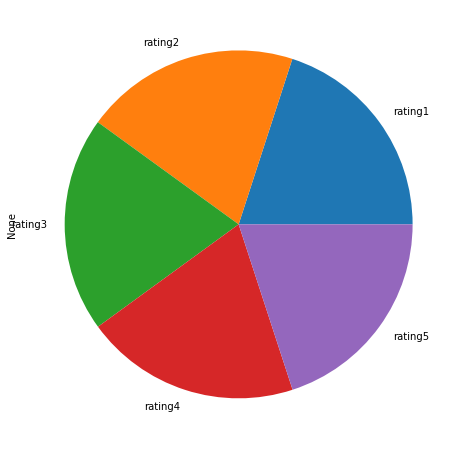

In [16]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
toxic_comments_labels.sum(axis=0).plot.pie()

In [17]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spresultaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [18]:
X = []
sentences = list(toxic_comments["review"])
for sen in sentences:
    X.append(preprocess_text(sen))

y = toxic_comments_labels.values

In [19]:
X[9]

'Better off buying an authentic charger Packaging was great Temporary fix but best to spend little more for better quality '

In [20]:
toxic_comments_labels.values

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [22]:
print(x_train[90])

they send us phone and the screen does not even come on IT LOOKED GOOD ON THE PICTURE BUT NOT WHEN WE GOT IT


In [23]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)

In [24]:
x_train[0]

array([   6,   89,   49,   12,    9,   97,  171,  170,  159, 1802,   32,
       3396,  379, 2811,   12,   47,   15,    4,  110,    2,   12,   55,
        218,  273,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [25]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [17]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(5, activation='softmax')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [18]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 100)          6349500   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 6,467,393
Trainable params: 117,893
Non-trainable params: 6,349,500
_________________________________________________________________
None


In [19]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)


Train on 159960 samples, validate on 39991 samples
Epoch 1/5
159960/159960 [==============================] - 383s 2ms/step - loss: 1.5947 - acc: 0.2280 - val_loss: 1.5582 - val_acc: 0.2922
Epoch 2/5
159960/159960 [==============================] - 383s 2ms/step - loss: 1.2233 - acc: 0.4003 - val_loss: 1.1009 - val_acc: 0.4876
Epoch 3/5
159960/159960 [==============================] - 383s 2ms/step - loss: 1.0019 - acc: 0.5398 - val_loss: 0.9457 - val_acc: 0.5654
Epoch 4/5
159960/159960 [==============================] - 385s 2ms/step - loss: 0.9154 - acc: 0.5822 - val_loss: 0.8930 - val_acc: 0.5951
Epoch 5/5
159960/159960 [==============================] - 390s 2ms/step - loss: 0.8717 - acc: 0.6042 - val_loss: 0.8624 - val_acc: 0.6111


In [20]:
score = model.evaluate(x_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

49988/49988 [==============================] - 60s 1ms/step
Test Score: 0.8596138384205404
Test Accuracy: 0.6113667488098145


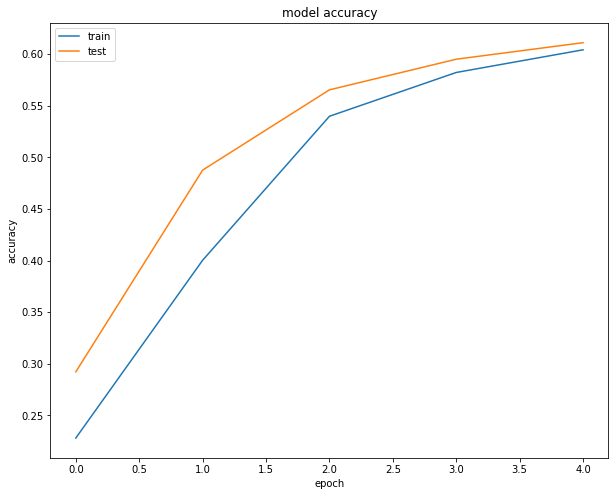

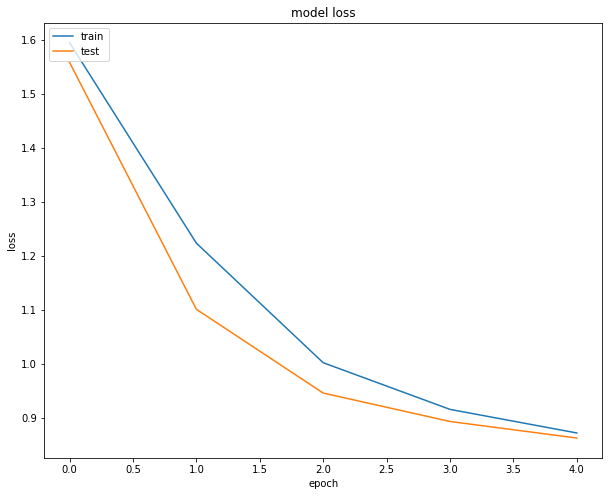

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [22]:
model.save('nlp86')

In [26]:
model = tf.keras.models.load_model('nlp86')

In [50]:
senpets = "Quality of matetial is good. and it looks like original leather.colour was same as shown in image. green colour looks unique. Price was high than other."

In [51]:
xp = [preprocess_text(senpets)]

In [52]:
xp

['Quality of matetial is good and it looks like original leather colour was same as shown in image green colour looks unique Price was high than other ']

In [53]:
x_trainp = np.array(xp)

In [54]:
x_trainp

array(['Quality of matetial is good and it looks like original leather colour was same as shown in image green colour looks unique Price was high than other '],
      dtype='<U149')

In [55]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)

x_trainp = tokenizer.texts_to_sequences(x_trainp)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

x_trainp = pad_sequences(x_trainp, padding='post', maxlen=maxlen)

In [56]:
x_trainp

array([[ 109,    7,    5,   35,    3,    2,  134,   29,  390,  642,   20,
         156,   22, 1483,   11, 1674,  855,  134, 2350,  111,   20,  363,
          60,   66,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [57]:
result = model.predict(x_trainp)

In [58]:
np.set_printoptions(suppress=True)

In [59]:
result

array([[0.01331904, 0.05293272, 0.29380608, 0.63255125, 0.00739088]],
      dtype=float32)

In [3]:
tf.VERSION

'1.14.0'